# [CoE202] note 04a. Linear classification

- Class Date : 21.03.25
- Office Hour : -----------
- If you have any questions, ask via KLMS Q&A board or come to TA office hour to get our help.


Given a data set, we want to find a linear (binary) classifier. 

In [1]:
# this is just an annotation
import numpy as np # this is for importing numpy library (and we will use abbreviation np for that)
import matplotlib.pyplot as plt # this is for importing matplotlib.pyplot (library for graph plot)
import scipy.io

Let's load the data file.

In [2]:
# load data file from Google drive
# from google.colab import drive
# drive.mount("/content/drive")

# change the path below to the file location on your own google drive
mat = scipy.io.loadmat('./data_linear_classification.mat')

data = mat['data']
label = mat['label']

First, let's define a simple function for data visualization.

In [3]:
# define a function to plot data
def show_data_binary_class(data, label):
    fig, ax = plt.subplots()
    ind = 0
    for color in ['tab:blue', 'tab:orange']:
        current_ind = np.where(label==ind)[1]
        x = data[0,current_ind]
        y = data[1,current_ind]
        ax.scatter(x, y, c=color, edgecolors='none')
        ind +=1

Let's check out the data.

ground truth
(2, 1000)


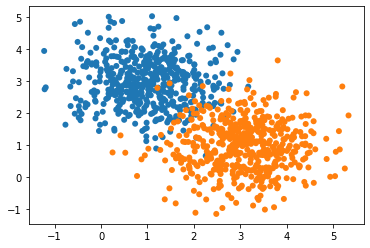

In [4]:
# show ground truth classification
print('ground truth')
show_data_binary_class(data, label)

print(data.shape)

We are going to define a simple linear classifier.

The forward part may look quite simple.

Notice that the input x is a 2 x n data matrix rather than a single data point.

Backward part is for calculating the gradient using chain rule.

It is written in matrix form, so it may not be very obvious as to what each line means.

Take a close look at each line!



In [5]:
# define our linear classifier
class linear_classifier():

    # initialization
    def __init__(self, W_init, b_init):
        super(linear_classifier, self).__init__()
        self.W = W_init
        self.b = b_init
    # forward pass
    def forward(self, x):
        z = np.matmul(self.W,x)+self.b
        y = 1/(1+np.exp(-z))
        return y
    # backward pass
    def backward(self, x, y, label):
        loss = cross_entropy(y, label)

        dLdz = (y-label)
        dLdb = np.mean(dLdz, axis=1, keepdims=True)
        dLdw = np.mean(x*np.repeat(dLdz, 2, axis=0), axis=1)

        loss_avg = np.mean(loss)        
        prediction_threshold = (y>0.5)
        accuracy = np.mean(prediction_threshold==label)

        return loss_avg, accuracy, dLdw, dLdb
    # update parameters
    def update(self, dW, db):
        self.W = self.W + dW
        self.b = self.b + db   
    # retrieve weights
    def getWb(self):
        return self.W, self.b

# define cross entropy loss
def cross_entropy(prediction, label):
    epsilon = 1e-10
    prediction = np.clip(prediction, epsilon, 1. - epsilon)
    ce = -( np.log(prediction) *label + np.log(1-prediction)*(1-label))
    return ce             

Let's constrcut a classifier with random initial parameters.

In [6]:
# initialize my classifier
W_init = np.random.rand(1,2)
b_init = np.random.rand(1,1)
my_classifier = linear_classifier(W_init, b_init)
W, b = my_classifier.getWb()

Let's feed the data matrix into the untrained classifier and see what happens.

current classification


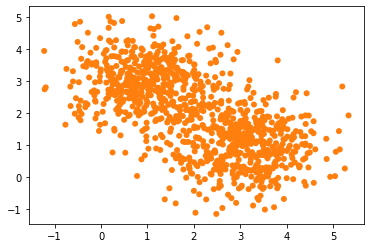

In [7]:
# test our initial (untrained) classifier
prediction = my_classifier.forward(data)
prediction_threshold = (prediction>0.5)

# visualize the results from the untrained classifier
print('current classification')
show_data_binary_class(data, prediction_threshold)

Ok, now let's start training our classifier (using gradient descent)!

In [8]:
# train linear classifier
n_iter = 1000
learning_rate = 0.1
loss_iter = np.zeros(n_iter, dtype=float)
accuracy_iter = np.zeros(n_iter, dtype=float)
for iter in range(n_iter):
    prediction =  my_classifier.forward(data)
    [loss, accuracy, dLdw, dLdb] =  my_classifier.backward(data, prediction, label)
    dW = -learning_rate*dLdw
    db = -learning_rate*dLdb
    my_classifier.update(dW, db)
    loss_iter[iter] = loss

    prediction_threshold = (prediction>0.5)
    accuracy_iter[iter] = accuracy

    if iter%100 == 0:
        print('Epoch: {}/{}.............'.format(iter, n_iter), end=' ')
        print("Loss: {:.4f}".format(loss.item()))

Epoch: 0/1000............. Loss: 1.6757
Epoch: 100/1000............. Loss: 0.1568
Epoch: 200/1000............. Loss: 0.1270
Epoch: 300/1000............. Loss: 0.1165
Epoch: 400/1000............. Loss: 0.1111
Epoch: 500/1000............. Loss: 0.1079
Epoch: 600/1000............. Loss: 0.1058
Epoch: 700/1000............. Loss: 0.1044
Epoch: 800/1000............. Loss: 0.1033
Epoch: 900/1000............. Loss: 0.1026


[Let's visualize the loss function.

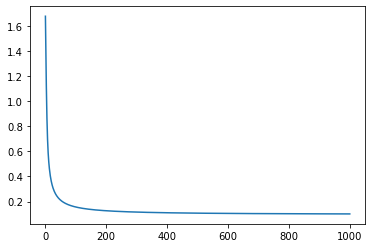

In [9]:
# show loss during training
plt.plot( range(1,n_iter+1), loss_iter)  

Let's visualize the accuracy.

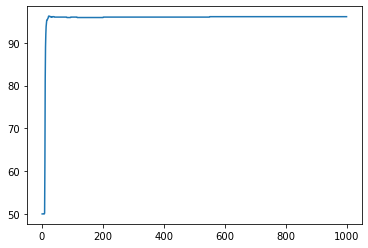

In [10]:
# show accuracy during training
plt.plot(  range(1,n_iter+1), 100*accuracy_iter)  

Lastly, let's visualize how well our classifier performs.

current classification


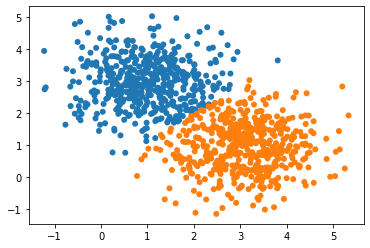

In [11]:
# show result from trained classifier
print('current classification')
show_data_binary_class(data, prediction_threshold)